In [5]:
import sys, os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [7]:
sys.path.append("../python-scripts/")
import functions_common

In [11]:
parameters = functions_common.read_parameters()
parameters

{'data_folder': '/home/fjodor/Data/zebrafish_xenograft/data_structured/',
 'output_folder': '/home/fjodor/Data/zebrafish_xenograft/data_structured/thresholding_sauvola/',
 'key_file_name': 'Details_imaging_data_3D.xls',
 'dimension': '2D',
 'channel_tumor': 0,
 'channel_macrophages': 1,
 'channel_vessels': 2,
 'substract_tumor_from_macrophages': False,
 'thresholding_method': 'sauvola',
 'window_size_thresholding': 31,
 'otsu_thresholding': False,
 'sigma': 3,
 'segmentation_method': 'ilastik',
 'macrophages_small_objects': 2500,
 'export_masks': 'vtk',
 'use_gpu': False,
 'output_filename': 'image_001'}

In [20]:
key_file = functions_common.read_key_file(parameters)
print(key_file.columns)
key_file.head()

Index(['filename', 'short_name', 'DOF', 'Tg', 'cancer_cells', 'fluorescence',
       'dpf', 'dpi', 'dt_min', 'PixelSizeX', 'PixelSizeY', 'PixelSizeZ',
       '#embryos', 'Time-lapses', 'Segmentation strategies', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Remarks \nsegmentation',
       'Remarks'],
      dtype='object')


,filename,short_name,DOF,Tg,cancer_cells,fluorescence,dpf,dpi,dt_min,PixelSizeX,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Remarks \nsegmentation,Remarks
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,ilastik,NaN,NaN,Otsu,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,C2,C3,C1,C2,C3,C1,C2,C3,NaN,NaN
2,200804 mpeg-mCherry x kdrl-lynEYFP LBT070 1in2...,200804_LBT070_1dpi_Pos001,04/08/2020,mpeg:mCherry; kdrl:lynEYFP,LBT070,1/27 GFP,2.0,1.0,30.0,0.4329,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,200804 mpeg-mCherry x kdrl-lynEYFP LBT070 1in2...,200804_LBT070_1dpi_Pos003,04/08/2020,mpeg:mCherry; kdrl:lynEYFP,LBT070,1/27 GFP,2.0,1.0,30.0,0.4329,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,200804 mpeg-mCherry x kdrl-lynEYFP LBT070 1in2...,200804_LBT070_1dpi_Pos005,04/08/2020,mpeg:mCherry; kdrl:lynEYFP,LBT070,1/27 GFP,2.0,1.0,30.0,0.4329,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


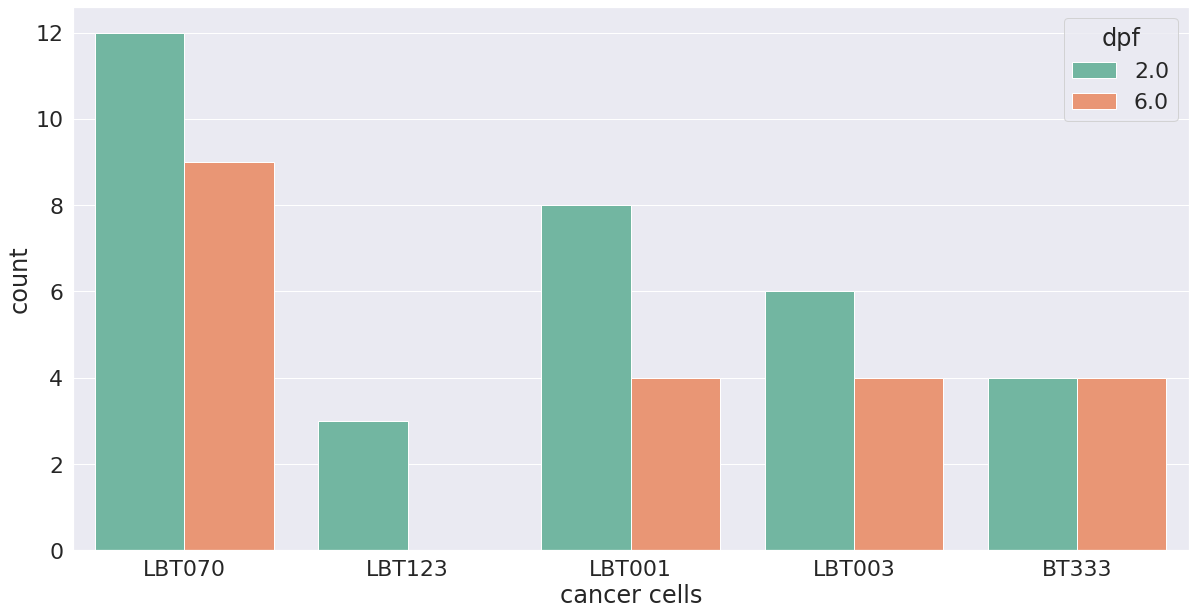

In [33]:
sns.set(font_scale = 2)
fig, ax = plt.subplots( figsize=(20,10))
sns.countplot(x = "cancer_cells", hue= "dpf", data= key_file, ax=ax, palette="Set2")
ax.set_xlabel("cancer cells")
plt.savefig("data_abundance.png")

<AxesSubplot:xlabel='dpf', ylabel='count'>

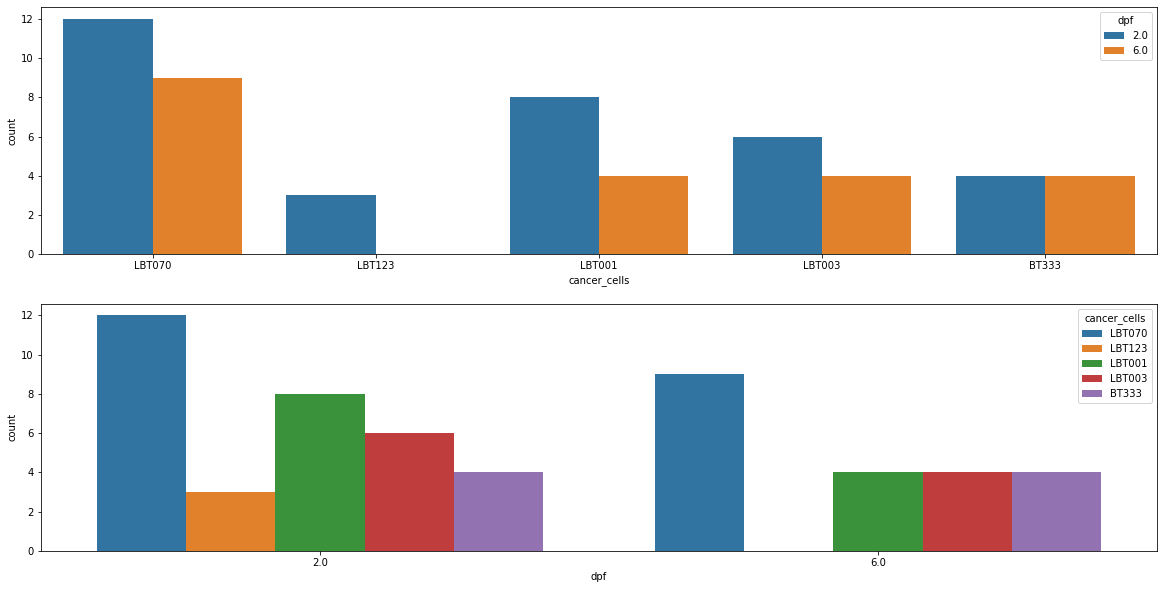

In [28]:
fig, ax = plt.subplots(2,1, figsize=(20,10))
sns.countplot(x = "cancer_cells", hue= "dpf", data= key_file, ax=ax[0])
sns.countplot(x = "dpf", hue= "cancer_cells", data= key_file, ax=ax[1])